In [ ]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the file
data=pd.read_csv('/content/Wine_clust .csv')

In [ ]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# Finding the null values
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
data_cl=data

In [ ]:
# K means Clustering

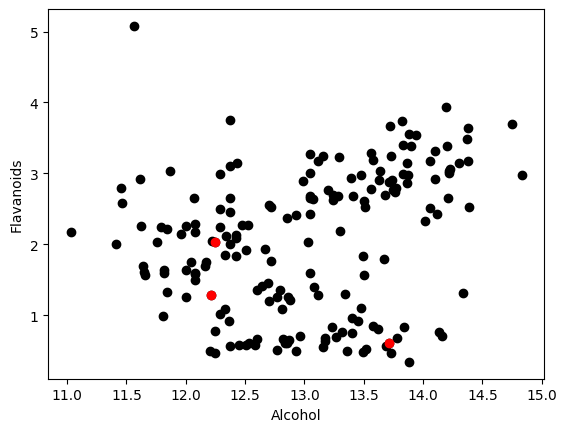

In [ ]:
# Choosing the number of clusters (k) = 3
# Select random centroids for each cluster

X=data_cl
# Define number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Alcohol"],X["Flavanoids"],c='black')
plt.scatter(Centroids["Alcohol"],Centroids["Flavanoids"],c='red')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
K = 3
# Fit a K-means model
kmeans = KMeans(n_clusters=K, random_state=0)
X["Cluster"] = kmeans.fit_predict(X[["Alcohol", "Flavanoids"]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


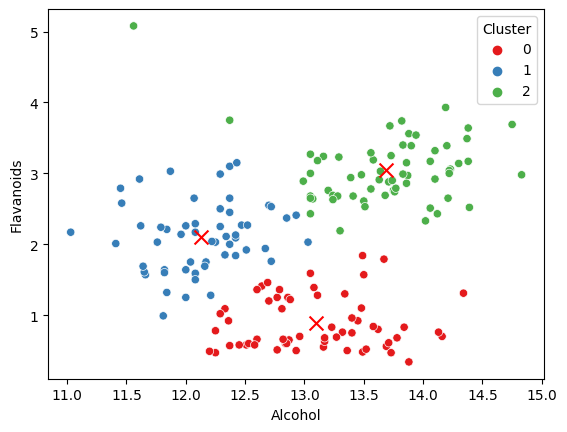

In [ ]:
# Get cluster centroids
centroids = kmeans.cluster_centers_
# Plot the data points and centroids
sns.scatterplot(data=X, x="Alcohol", y="Flavanoids", hue="Cluster", palette='Set1')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.show()

In [ ]:
# Getting inertia
inertia = kmeans.inertia_

# Printing the inertia
print("Inertia:", inertia)

Inertia: 78.96735265671242


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

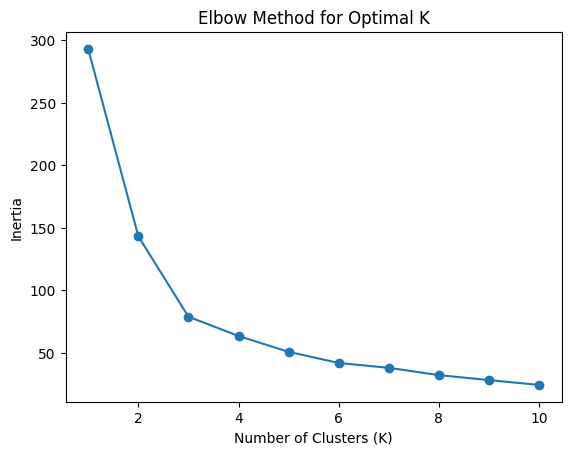

In [ ]:
# Defining K values to test in a range
K_range = range(1, 11)  #(start, stop+1)  (start=1 , stop = 10)  (1,11)
inertia_values = []

# Calculating the inertia for different values of K
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(X[["Alcohol", "Flavanoids"]])
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

# Ploting the inertia values Elbow method
plt.plot(K_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#Cluster evaluation using silhouette score, Dunn score
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X[["Alcohol", "Flavanoids"]], X["Cluster"])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.49811703308582106


In [ ]:
# Agglomerative Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
data_cl=np.array(data_cl)

In [ ]:
Z=linkage(data_cl,method="ward")

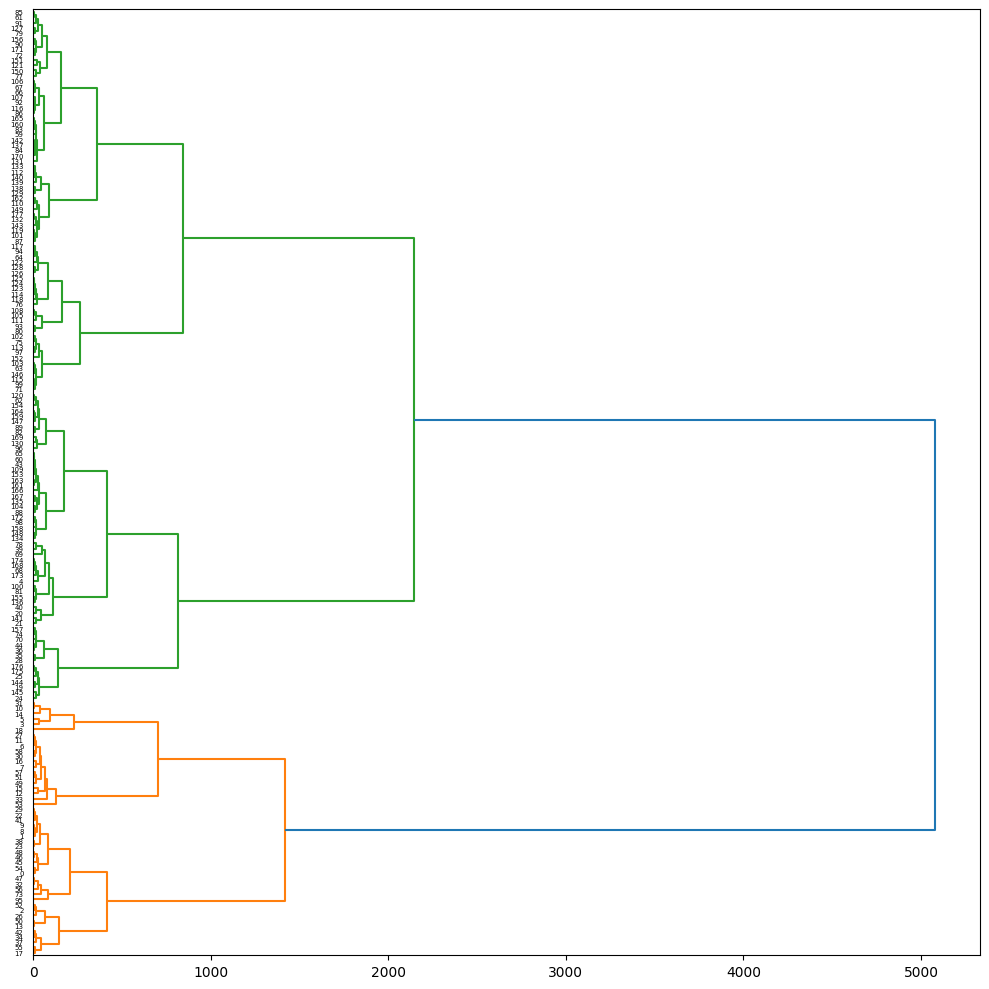

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
ax=dendrogram(Z,orientation="right")
plt.tight_layout()
plt.show()